<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Tratamiento de datos Faltantes </font> </center>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('API_SI.POV.DDAY_DS2.csv',encoding='latin-1',sep='\t')
df.head(10)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualización de datos faltantes

In [39]:
# Mapa de calor
dfcopy=df.copy()
dfcopy=dfcopy.isna()
dfcopy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [40]:
np.NaN,np.nan

(nan, nan)

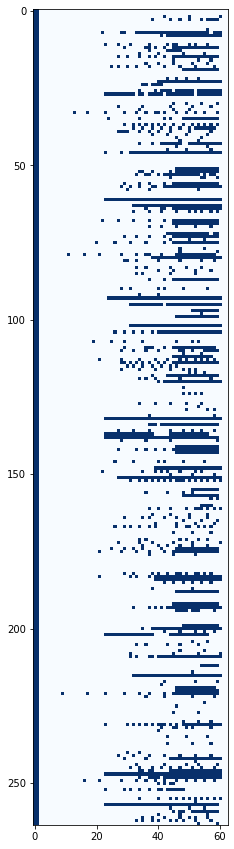

In [41]:
plt.figure(figsize=(5,15))
#plt.imshow(dfcopy,cmap='Blues') # En azul los datos perdidos
plt.imshow(~dfcopy,cmap='Blues') # En blanco los datos perdidos

In [42]:
# Matriz de co-ocurrencia
# 
# Suponemos una correlación entre las variables 'Argentina' (index 7) y 'Armenia' (index 8)
df.loc[7]

Country Name    Argentina
Country Code          ARG
1960                  NaN
1961                  NaN
1962                  NaN
                  ...    
2016                  1.0
2017                  0.8
2018                  1.3
2019                  NaN
2020                  NaN
Name: 7, Length: 63, dtype: object

In [43]:
df.loc[8]

Country Name    Armenia
Country Code        ARM
1960                NaN
1961                NaN
1962                NaN
                 ...   
2016                1.2
2017                0.9
2018                1.4
2019                NaN
2020                NaN
Name: 8, Length: 63, dtype: object

In [44]:
df[df['Country Name']=='Argentina']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN


In [45]:
df[df['Country Name']=='Armenia']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN


In [46]:
dfNaN=df.copy()
dfNaN.fillna('NaN',inplace=True)
pd.crosstab(dfNaN.loc[7],dfNaN.loc[8])

8,0.9,1.0,1.2,1.3,1.4,1.5,1.6,1.8,2.1,2.7,5.5,7.9,10.5,12.2,14.4,ARM,Armenia,NaN
7,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Eliminación de datos

In [47]:
# Eliminación de filas (variables)
df.dropna()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [48]:
# Eliminación de columnas (observaciones)
df.dropna(axis=1)

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [49]:
# Eliminando variables y observaciones sin datos
dfcopy.sum(),df.shape # DataFrame con True y False

(Country Name      0
 Country Code      0
 1960            264
 1961            264
 1962            264
                ... 
 2016            176
 2017            185
 2018            227
 2019            264
 2020            264
 Length: 63, dtype: int64,
 (264, 63))

In [50]:
dfcopy.sum(axis=1)

0      61
1      61
2      58
3      52
4      61
       ..
259    49
260    58
261    54
262    52
263    59
Length: 264, dtype: int64

In [51]:
df1=df.copy()
var,=np.where(dfcopy.sum()>263)
obs,=np.where(dfcopy.sum(axis=1)>60)
df1=df.drop(index=obs,columns=df.columns[var])
df1.head()

,Country Name,Country Code,1967,1969,1971,1974,1975,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.8,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.0,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4


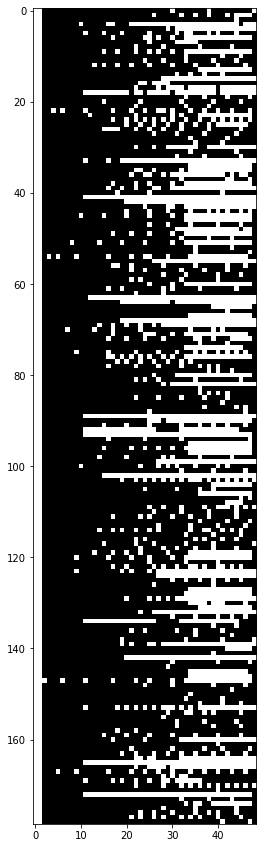

In [52]:
df1NaN=df1.isna()
plt.figure(figsize=(5,15))
plt.imshow(df1NaN,cmap='Greys')

In [74]:
df=pd.DataFrame(np.random.randn(100,4)+10*np.random.rand(4),columns=['A','B','C','D'])
for c in df.columns[:-1]:
    inan=np.random.randint(100,size=np.random.randint(20))
    df[c].iloc[inan]=np.NaN
    print(inan,c)

[53 84 50  8] A
[61 67] B
[25 10 92 25  7 89  7 69] C


In [75]:
# Eliminación de filas (Observaciones)
df.dropna()

,A,B,C,D
0,3.388462,6.943049,9.576591,3.260653
1,4.237029,10.472642,8.542364,5.338160
2,4.958815,10.696495,7.991952,3.909423
3,4.023715,10.443569,10.208182,4.645876
4,4.654658,9.683763,8.531782,4.094101
...,...,...,...,...
95,5.103167,9.267682,8.376659,2.642039
96,4.177638,10.004600,6.808244,3.384896
97,4.835943,9.538935,8.424867,5.130428
98,4.693250,9.073394,8.231244,4.329311


In [76]:
# Eliminación de columnas (Variables)
df.dropna(axis=1)

,D
0,3.260653
1,5.338160
2,3.909423
3,4.645876
4,4.094101
...,...
95,2.642039
96,3.384896
97,5.130428
98,4.329311


# Imputación de datos

### Sustitución por media

In [77]:
m=df.mean()
s=df.std(ddof=0)
m

A    4.876610
B    9.931282
C    8.877654
D    4.426377
dtype: float64

In [78]:
dfm=df.copy()
dfm.fillna(m,inplace=True)
dfm.head()

,A,B,C,D
0,3.388462,6.943049,9.576591,3.260653
1,4.237029,10.472642,8.542364,5.338160
2,4.958815,10.696495,7.991952,3.909423
3,4.023715,10.443569,10.208182,4.645876
4,4.654658,9.683763,8.531782,4.094101


In [79]:
m-dfm.mean()

A   -8.881784e-16
B    1.776357e-15
C    0.000000e+00
D    0.000000e+00
dtype: float64

In [80]:
s-dfm.std(ddof=0)

A    0.019310
B    0.009478
C    0.030723
D    0.000000
dtype: float64

### Sustitución por mediana

In [81]:
me=df.median()
me

A    4.749557
B    9.989227
C    8.824067
D    4.433816
dtype: float64

In [82]:
dfme=df.copy()
dfme.fillna(me,inplace=True)
dfme.head()

,A,B,C,D
0,3.388462,6.943049,9.576591,3.260653
1,4.237029,10.472642,8.542364,5.338160
2,4.958815,10.696495,7.991952,3.909423
3,4.023715,10.443569,10.208182,4.645876
4,4.654658,9.683763,8.531782,4.094101


In [83]:
me-dfme.median()

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

### Sustitución por moda

In [84]:
df.mode?

In [85]:
mo=df.mode().iloc[0]
mo

A    2.439163
B    6.943049
C    6.785088
D    1.906808
Name: 0, dtype: float64

In [86]:
dfmo=df.copy()
dfmo.fillna(mo,inplace=True)

In [87]:
dfmo

,A,B,C,D
0,3.388462,6.943049,9.576591,3.260653
1,4.237029,10.472642,8.542364,5.338160
2,4.958815,10.696495,7.991952,3.909423
3,4.023715,10.443569,10.208182,4.645876
4,4.654658,9.683763,8.531782,4.094101
...,...,...,...,...
95,5.103167,9.267682,8.376659,2.642039
96,4.177638,10.004600,6.808244,3.384896
97,4.835943,9.538935,8.424867,5.130428
98,4.693250,9.073394,8.231244,4.329311


In [102]:
#el método que se debe evitar cuando la variable es númerica con datos perdidos es la moda
mo-dfmo.mode()

,A,B,C,D
0,0.0,0.0,0.0,0.000000
1,NaN,NaN,NaN,-0.735231
2,NaN,NaN,NaN,-0.772725
3,NaN,NaN,NaN,-0.825140
4,NaN,NaN,NaN,-0.993819
...,...,...,...,...
95,NaN,NaN,NaN,-4.017625
96,NaN,NaN,NaN,-4.090781
97,NaN,NaN,NaN,-4.171551
98,NaN,NaN,NaN,-4.446819


### Sustitución aleatoria

In [88]:
df['A'].shape

(100,)

In [89]:
# Obtenemos un valor desde un índice aleatorio de la misma dimensión que la variable
dim=df['A'].shape[0]
i=np.random.randint(dim)
v=df['A'][i]
i,v

(39, 5.204108014753682)

In [90]:
# Para evitar sustituir NaNs en los valores perdidos, omitimos los valores perdidos en la variable
dim=df['A'].dropna().shape[0]
dim

96

In [91]:
i=np.random.randint(dim)
v=df['A'].dropna().iloc[i] # Obtenemos la posición 'i' (no el índice)
i,v

(64, 4.987243390011642)

In [92]:
nanA=np.where(df['A'].isna())[0]
nanA

array([ 8, 50, 53, 84], dtype=int64)

In [93]:
dim=df['A'].dropna().shape[0]
i=np.random.randint(dim,size=len(nanA))
i,dim

(array([41, 41, 67, 44]), 96)

In [94]:
dfa=df.copy()
dfa['A'].loc[nanA]=df['A'].dropna().iloc[i].values
dfa['A'].isna().sum()

0

In [101]:
#El método de imputación preferible si la variable es estrictamente aleatoria es una imp. aleatoria
dfcopy=df.copy()
for c in df.columns:
    nan=np.where(df[c].isna())[0]
    dim=df[c].dropna().shape[0]
    i=np.random.randint(dim,size=len(nan))
    dfcopy[c].loc[nan]=df[c].dropna().iloc[i].values
dfcopy.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

# Imputación usando clases

In [106]:
from sklearn.impute import SimpleImputer

In [ ]:
imp=SimpleImputer() # Imputación por media
data=imp.fit_transform(df)
data

In [ ]:
pd.DataFrame(data,columns=df.columns)

In [ ]:
imp=SimpleImputer(strategy='median') # strategy='most_frquent'  ->  Sustitución por moda
pd.DataFrame(imp.fit_transform(df),
             columns=df.columns)

In [ ]:
imp.fit_transform(df[['A']]) # Regresa unicamente la variable 'A' imputada

In [112]:
# Asignando diferentes estrategias para cada variable
d={'A':df['A'].mean(),
   'B':df['B'].median(),
   'C':df['C'].mode()[0]}
dfcopy=df.copy()
dfcopy.fillna(d,inplace=True)
dfcopy.head()

,A,B,C,D
0,2.140174,2.691612,4.671064,5.097600
1,3.083108,2.070593,5.111856,6.187832
2,1.897481,2.395989,6.022336,6.409515
3,3.662784,1.182757,6.302671,4.949003
4,2.140174,2.298322,8.065928,4.600365


In [113]:
m-dfcopy.mean()

A   -4.440892e-16
B   -2.500155e-04
C    2.246876e-01
D    0.000000e+00
dtype: float64

In [114]:
me-dfcopy.median()

A    0.033690
B    0.000000
C    0.116891
D    0.000000
dtype: float64

In [118]:
mo-dfcopy.mode().loc[0]

A   -2.442397
B   -2.251013
C    0.000000
D    0.000000
Name: 0, dtype: float64

# Valores extremos

In [120]:
df.iloc[3,0]=150
df.iloc[10:15,1]=200
df.iloc[0:5,-1]=-200
df.head(15)

,A,B,C,D
0,NaN,2.691612,4.671064,-200.000000
1,3.083108,2.070593,5.111856,-200.000000
2,1.897481,2.395989,6.022336,-200.000000
3,150.000000,1.182757,6.302671,-200.000000
4,NaN,2.298322,8.065928,-200.000000
5,2.161450,0.454973,7.298415,5.143961
6,2.305650,0.629639,5.365670,5.508725
7,2.119950,1.354913,7.165789,7.441125
8,2.817146,4.522155,7.112316,4.860090
9,4.461111,2.476356,NaN,4.448916


In [121]:
Q=df.quantile([0.25,0.75])
iqr=Q.loc[0.75]-Q.loc[0.25]
Li=Q.loc[0.25]-3*iqr
Ls=Q.loc[0.75]+3*iqr
Li

A   -1.598560
B   -3.131028
C    1.309952
D    0.616476
dtype: float64

In [122]:
Ls

A     5.857433
B     7.511783
C    11.163510
D    10.503418
dtype: float64

In [123]:
TF=(df<Li)|(df>Ls)
TF.head()

,A,B,C,D
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,True,False,False,True
4,False,False,False,True


In [124]:
df[TF]=np.NaN
df.head()

,A,B,C,D
0,NaN,2.691612,4.671064,NaN
1,3.083108,2.070593,5.111856,NaN
2,1.897481,2.395989,6.022336,NaN
3,NaN,1.182757,6.302671,NaN
4,NaN,2.298322,8.065928,NaN


In [126]:
# 'A': media
# 'B': mediana
# 'C': moda
d={'A':df['A'].mean(),
   'B':df.B.median(),
   'C':df.C.mode()[0]}
d

{'A': 2.1228713213197854, 'B': 2.081804259604912, 'C': 3.692705980264429}

In [ ]:
!pip install feature-engine

In [128]:
from feature_engine.imputation import RandomSampleImputer

In [129]:
# 'D' -> Sustitución aleatoria
imp=RandomSampleImputer(['D'])
df1=imp.fit_transform(df)
df1

,A,B,C,D
0,NaN,2.691612,4.671064,6.814255
1,3.083108,2.070593,5.111856,4.572962
2,1.897481,2.395989,6.022336,5.179742
3,NaN,1.182757,6.302671,6.571884
4,NaN,2.298322,8.065928,6.637161
...,...,...,...,...
95,1.395615,3.554339,NaN,5.485170
96,3.491355,2.141955,6.962491,6.279535
97,2.235754,1.439508,6.243036,7.066195
98,3.793426,0.794901,5.795918,6.259384


In [130]:
df1.fillna(d,inplace=True)
df1

,A,B,C,D
0,2.122871,2.691612,4.671064,6.814255
1,3.083108,2.070593,5.111856,4.572962
2,1.897481,2.395989,6.022336,5.179742
3,2.122871,1.182757,6.302671,6.571884
4,2.122871,2.298322,8.065928,6.637161
...,...,...,...,...
95,1.395615,3.554339,3.692706,5.485170
96,3.491355,2.141955,6.962491,6.279535
97,2.235754,1.439508,6.243036,7.066195
98,3.793426,0.794901,5.795918,6.259384


#### Si una variable es categórica y tiene valores perdidos la imputación preferible es una imp. por moda o aleatoria del conjunto de categorías